# Tensorflow 2.0

In [39]:
# !pip install sklearn

In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
tf.test.gpu_device_name()

'/device:GPU:0'

## Linear Regression (w*x + b)
<strong> Implementing Linear Regression with Tensorflow2.0</strong>

In [42]:
data = pd.read_csv('linear_regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [43]:
xtrain = data.SAT
ytrain = data.GPA

In [57]:
w = tf.Variable(np.random.randn(),name='weight')
b = tf.Variable(np.random.randn(),name='intercept')

In [58]:
def linear_regression(x):
    
    return w * x + b

In [59]:
def lossfun(actual,pred):
    return tf.reduce_sum(tf.pow(pred - actual,2)) / (xtrain.shape[0])

optimizer = tf.optimizers.Adam(0.01)

In [60]:
def optimize():
    
    with tf.GradientTape() as g:
        pred = linear_regression(xtrain)
        loss = lossfun(ytrain,pred)
    grad = g.gradient(loss,[w,b])
    
    optimizer.apply_gradients(zip(grad,[w,b]))

In [61]:
# %reload_ext tensorboard
# %tensorboard --logdir logs/training/

In [62]:
for i in range(1000):
    
    logs = tf.summary.create_file_writer('/logs/training/')
    with logs.as_default():
        optimize()
        if i % 50 == 0:
            ypred = linear_regression(xtrain)
            loss  = lossfun(ytrain,ypred)
            print('Epoch {} loss {}'.format(i,loss))
            tf.summary.scalar('Loss',loss,step=i)

Epoch 0 loss 5064340.0
Epoch 50 loss 1910387.75
Epoch 100 loss 537098.25
Epoch 150 loss 108765.4765625
Epoch 200 loss 15315.23828125
Epoch 250 loss 1464.7484130859375
Epoch 300 loss 92.64915466308594
Epoch 350 loss 3.743489980697632
Epoch 400 loss 0.1302185356616974
Epoch 450 loss 0.04515611380338669
Epoch 500 loss 0.04417206719517708
Epoch 550 loss 0.04416856914758682
Epoch 600 loss 0.04416856914758682
Epoch 650 loss 0.044168561697006226
Epoch 700 loss 0.04416855797171593
Epoch 750 loss 0.04416855052113533
Epoch 800 loss 0.04416854679584503
Epoch 850 loss 0.04416854307055473
Epoch 900 loss 0.044168539345264435
Epoch 950 loss 0.04416852071881294


In [63]:
for i in range(10):
    print('X : {} Y : {:.2f} Y^ : {}'.format(xtrain[i],ytrain[i],linear_regression(xtrain[i])))

X : 1714 Y : 2.40 Y^ : 3.074080467224121
X : 1664 Y : 2.52 Y^ : 2.977144241333008
X : 1760 Y : 2.54 Y^ : 3.163261890411377
X : 1685 Y : 2.74 Y^ : 3.017857313156128
X : 1693 Y : 2.83 Y^ : 3.033367156982422
X : 1670 Y : 2.91 Y^ : 2.988776445388794
X : 1764 Y : 3.00 Y^ : 3.1710166931152344
X : 1764 Y : 3.00 Y^ : 3.1710166931152344
X : 1792 Y : 3.01 Y^ : 3.2253010272979736
X : 1850 Y : 3.01 Y^ : 3.337747097015381


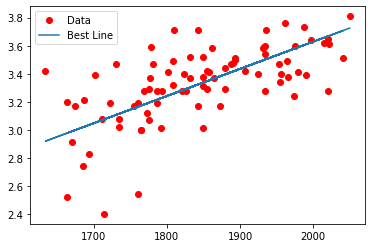

In [64]:
plt.plot(xtrain,ytrain,'ro',label='Data')
plt.plot(xtrain,w*xtrain +b,label='Best Line')
plt.legend()
plt.show()


## Putting all together into a class

In [9]:
class LinearRegression:
    def __init__(self,callback=False,
                 optimizer = tf.optimizers.Adam(0.01),
                 epochs = 10,verbose=0):
        
        self.w = tf.Variable(np.random.randn(),name='Weights')
        self.b = tf.Variable(np.random.randn(),name='Intercept')
        self.callback  =  callback
        self.optimizer = optimizer
        self.epochs    = epochs
        self.verbose   = verbose
    def linear_regression(self,x):
        return self.w * x + self.b
    def loss_fun(self,actual,pred):
        return tf.reduce_sum(tf.pow(pred - actual,2)) / actual.shape[0]
    def optimize(self,x,y):
        
        with tf.GradientTape() as g:
            pred = self.linear_regression(x)
            loss = self.loss_fun(y,pred)
            
        grad = g.gradient(loss,[self.w,self.b])
        self.optimizer.apply_gradients(zip(grad,[self.w,self.b]))
        
    def fit(self,x,y):
        
        for i in range(self.epochs):
            self.optimize(x,y)
            
            space = len(str(self.epochs))
            if self.verbose:
                if i % self.verbose :
                    pred = self.linear_regression(x)
                    loss = self.loss_fun(y,pred)
                    print('Epoch :',' '*(space - len(str(i))),end=" ")
                    print('{} | Loss : {}'.format(i,loss))
                    
    def predict(self,x):
        return self.w * x + self.b
                        

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size=0.2)


print('Shape of train:',xtrain.shape)
print('Shape of test:',xtest.shape)
data.shape

Shape of train: (29,)
Shape of test: (8,)


(84, 2)

In [49]:
optimize = tf.optimizers.Adam(0.01)
linear = LinearRegression(verbose=10,epochs=1000,optimizer=optimize)

In [50]:
linear.fit(xtrain,ytrain)

Epoch :     1 | Loss : 8051557.5
Epoch :     2 | Loss : 7946098.0
Epoch :     3 | Loss : 7841376.5
Epoch :     4 | Loss : 7737404.5
Epoch :     5 | Loss : 7634195.0
Epoch :     6 | Loss : 7531754.0
Epoch :     7 | Loss : 7430096.5
Epoch :     8 | Loss : 7329231.5
Epoch :     9 | Loss : 7229166.5
Epoch :    11 | Loss : 7031476.5
Epoch :    12 | Loss : 6933869.0
Epoch :    13 | Loss : 6837094.5
Epoch :    14 | Loss : 6741163.0
Epoch :    15 | Loss : 6646079.0
Epoch :    16 | Loss : 6551851.0
Epoch :    17 | Loss : 6458483.5
Epoch :    18 | Loss : 6365980.5
Epoch :    19 | Loss : 6274348.0
Epoch :    21 | Loss : 6093707.5
Epoch :    22 | Loss : 6004707.5
Epoch :    23 | Loss : 5916591.5
Epoch :    24 | Loss : 5829359.5
Epoch :    25 | Loss : 5743017.0
Epoch :    26 | Loss : 5657561.5
Epoch :    27 | Loss : 5572996.5
Epoch :    28 | Loss : 5489321.0
Epoch :    29 | Loss : 5406534.5
Epoch :    31 | Loss : 5243629.0
Epoch :    32 | Loss : 5163508.5
Epoch :    33 | Loss : 5084273.5
Epoch :   

In [66]:
print('Train Loss',linear.loss_fun(ytrain,linear.predict(xtrain)).numpy())
print('Test Loss',linear.loss_fun(ytest,linear.predict(xtest)).numpy())

Train Loss 0.034543492
Test Loss 0.059093498


In [63]:
pred = linear.predict(xtest).numpy()
for i in range(5):
    print('X : {} Y : {:.2f} Y^ : {}'.format(xtest.iloc[i], ytest.iloc[i],pred[i] ))

X : 1849 Y : 3.31 Y^ : 3.309451103210449
X : 1872 Y : 3.17 Y^ : 3.3503124713897705
X : 1702 Y : 3.39 Y^ : 3.0482940673828125
X : 1810 Y : 3.71 Y^ : 3.2401645183563232
X : 1685 Y : 2.74 Y^ : 3.018092155456543
